# Minor Assignment 4: Linear Time-Invariant Systems

In [1]:
import sys 
from    StaccatoLab import *
import  numpy as np
import  matplotlib.pyplot  as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
version()

'StaccatoLab: version alpha.11'


Given graph `Gclip` below. Use the various view, sim, plot tools to analyze the program.

Create 3 copies of graph `Gclip`, rename each appropriately, and modify their behaviors:
1. `Glift`: add 4000 to each input value
2. `Gsample`: pass every `M`-th input value (`M=4`) and set the in-between values to 0.
3. `Ghold`: repeat every `M`-th input value `M` times and ignore the in-between input values.

and view/analyze their behaviors. 
Modify here means replace the *clip* output function `fo()` by another one.

Hint: consider the introduction of a self-loop and/or an input buffer (`edge.init(x=[..])`).

For each graph:
- Is the behavior LTI? Why (not)?
- What do you note about the `plot_data()`?
- What do you note about the `plot_periodogram()`? 

Beware: in signal processing, signals are functions from $~\mathbb{Z}~$ (the discrete time domain) to $~\mathbb{D}~$ (the data value domain). Since there is no minimum element in the time domain from where to start counting, the notion $M$-th value is ill-defined. For signal $~x[n], n \in \mathbb{Z}~$ there are, in principle, $M$ subsignals $~x[nM+m],  n \in \mathbb{Z}$, one for each $~0 \leq m < M$, that qualify. In this exercise, you may consider the subsignal with $~m=0$. Hence, `Gsample` must pass $~x[0], x[M], x[2M],  \ldots~$ when offered a semi-infinite signal (or stream as it is referred to in dataflow) $~x[i], 0 \leq i$. 

Grading for the 3 graph variations: [3, 3, 4]

mp3 (MP3)         : build       : ../audio/sultans.mp3: 16b, 60s*44.1kHz
Gclip (Graph)     : no errors


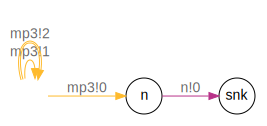

In [2]:
clip  = 4000
Gclip = Graph(rate=50000) 
G     = Gclip
G.mp3 = MP3(mp3='../audio/sultans.mp3', rate=44100)
#G.n   = Node(I=G.mp3, fo= [lambda x: -clip if x[0] < -clip else clip if x[0]>clip else x[0]])
G.n   = Node(I=G.mp3, fo= [lambda x: -clip if x < -clip else clip if x>clip else x])
G.snk = Node(I=G.n)
G.build()
G.plot_graph()

## Preliminaries

An arbitrary LTI system has two properties, namely **linear** and **time-invariant**. Concretely, for a LTI $T$, given input stream $x[n]$ and output stream $y[n]$,

- **Linear**: $\forall \alpha_1, \alpha_2 \in \mathbb C$ and $x_1, x_2 \in \mathbb S$,
    $$
        T(\alpha_1x_1[n]+\alpha_2x_2[n]) = \alpha_1T(x_1[n]) + \alpha_2T(x_1[n]) = \alpha_1y_1[n] + \alpha_2y_2[n]
    $$ 
    holds.


- **Time-invariant**: $\forall k \in \mathbb Z$,
    $$
        T(x[n]) = y[n] \rightarrow T(x[n-k]) = y[n-k]
    $$
    holds.

Therefore, if any of the above conditions does not hold for an system, its behavior is not LTI. We can perform proof by contradiction later to prove the behavior of the given system is not LTI.

According to [StaccatoLab-Reference.11-pre.pdf],

- `plot_data()` depicts the input and output stream in time domain.
- `plot_periodogram()` shows the information of frequency domain w.r.t input and output stream. Concretely, it plots the estimated power spectral density (PSD) of the numeric samples.

## Question 1: `Glift`

In this variation, we need to add 4000 to every input value, so we have

mp3 (MP3)         : build       : ../audio/sultans.mp3: 16b, 60s*44.1kHz
Glift (Graph)     : no errors


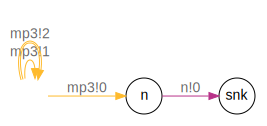

In [3]:
Glift = Graph(rate=50000) 
G     = Glift
G.mp3 = MP3(mp3='../audio/sultans.mp3', rate=44100)
G.n   = Node(I=G.mp3, fo= lambda x: x+4000)
G.snk = Node(I=G.n)
G.build()
G.plot_graph()

Then we can run a simulation to have a check.

In [4]:
G.view(sim=True)

Output()

It is easy to observe that for every input, its value has successfully been lifted up by 4000. We can also depict the input and output data in one figure to perform an intuitive check.

 #cycles real time  cpu time   #events  1(17)*  rate=50.0kHz
     100   2.000ms      0.1s       266  lasso=1(17)*, real time
  129400     2.59s     10.1s    342530  
  261400     5.23s     20.1s    691943  
  300000     6.00s     23.4s    794162  pause. (34ke/cs)


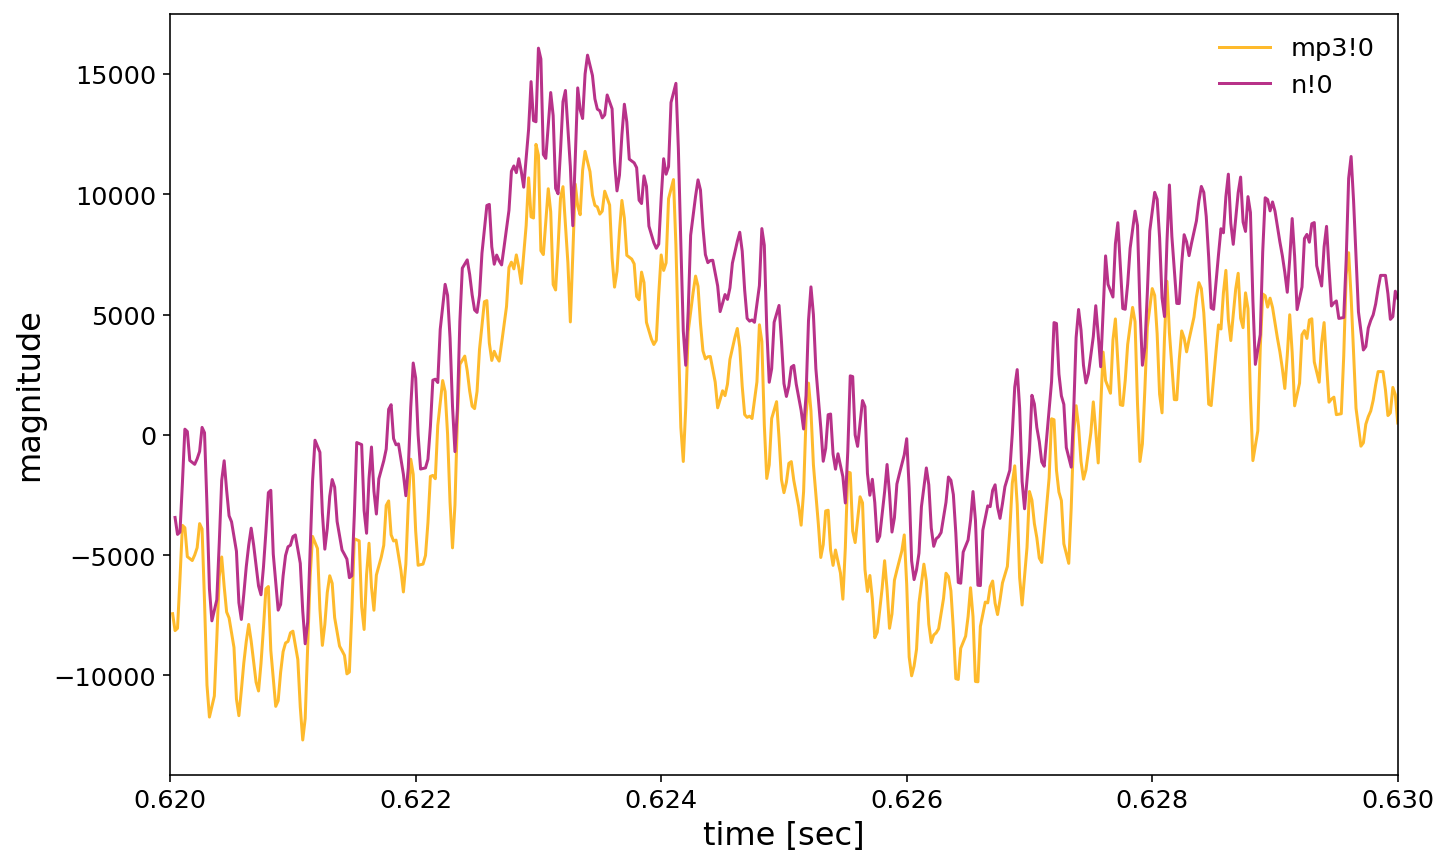

In [5]:
G.sim(T=6)
edges_concern=[G.n.I[0], G.n.O[0]]
G.plot_data(tmin=0.62, tmax=0.63, Edges=edges_concern);

From the previous two checks, we can conclude that the implementation for question `Glift` is correct. Next, we focus on the general questions for each graph.

### Is the behavior LTI? Why (not)?

No. Because linear property does not hold in this system. Concretely,

$$
T(\alpha_1x_1[n]+\alpha_2x_2[n]) = \alpha_1x_1[n]+\alpha_2x_2[n] + 4000
$$

$$
\begin{align}
    \alpha_1y_1[n] + \alpha_2y_2[n]
    &= \alpha_1(x_1[n]+4000) + \alpha_2(x_2[n]+4000)  \\
    &= \alpha_1x_1[n]+\alpha_2x_2[n] + 4000(\alpha_1+\alpha_2)
\end{align}
$$

Obviously, $T(\alpha_1x_1[n]+\alpha_2x_2[n]) = \alpha_1y_1[n] + \alpha_2y_2[n]$ does not hold $\forall \alpha_1, \alpha_2 \in \mathbb C$ and $x_1, x_2 \in \mathbb S$, so the behavior of `Glift` is **not** LTI.

### What do you note about the `plot_data()`?

The result of `plot_data()` for `Glift` is shown below.

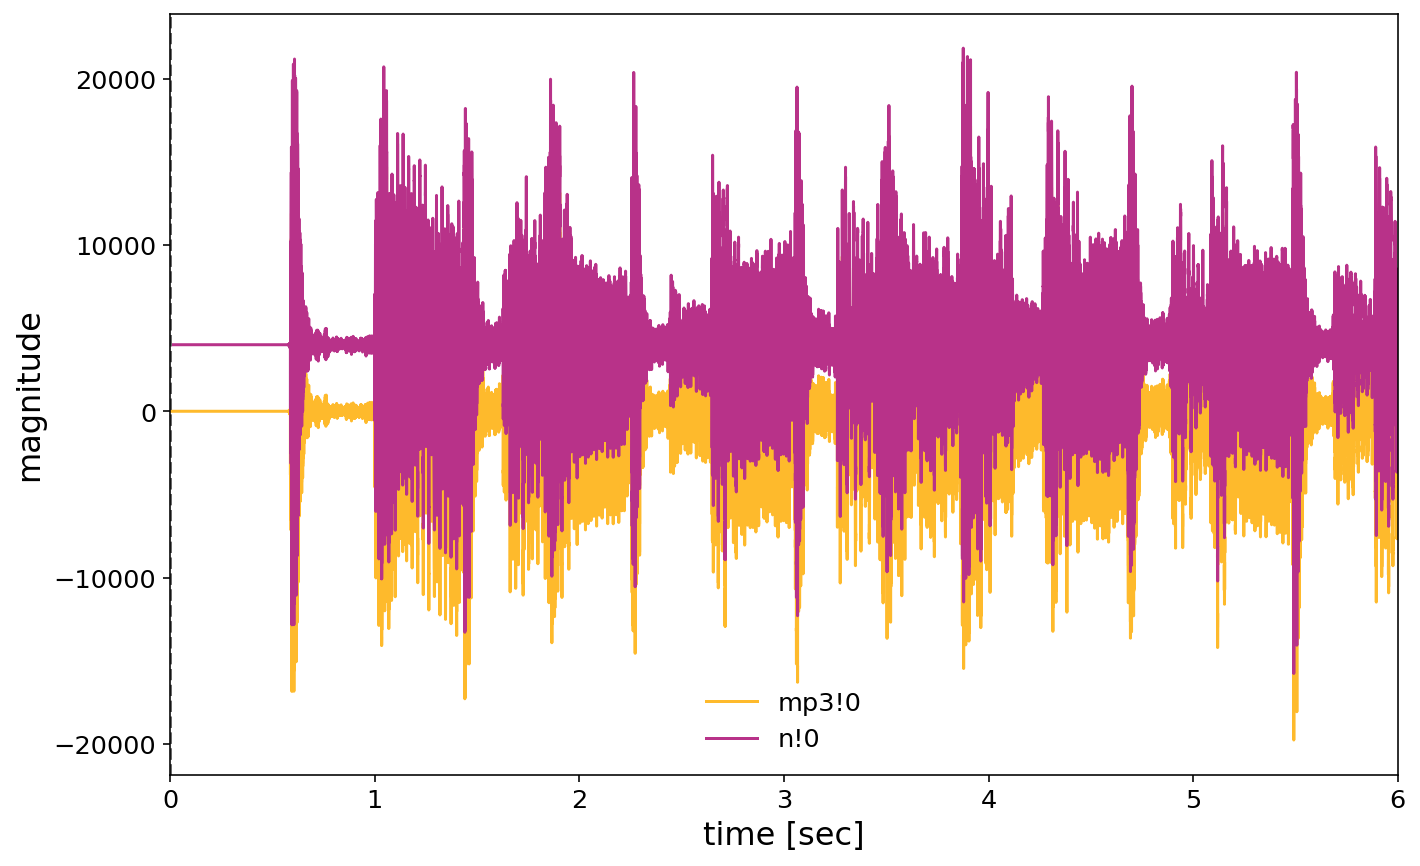

In [6]:
G.plot_data(Edges=edges_concern);

We can observe that the shape of the signal in time domain is exactly the same except the magnitude, the output stream (pink, n!0) is higher than the input stream, which are consistent with the modification of `Glift`. Although the change is obvious, but such change does not affect the frequency domain.

### What do you note about the `plot_periodogram()`?

The result of `plot_periodogram()` for `Glift` is shown below.

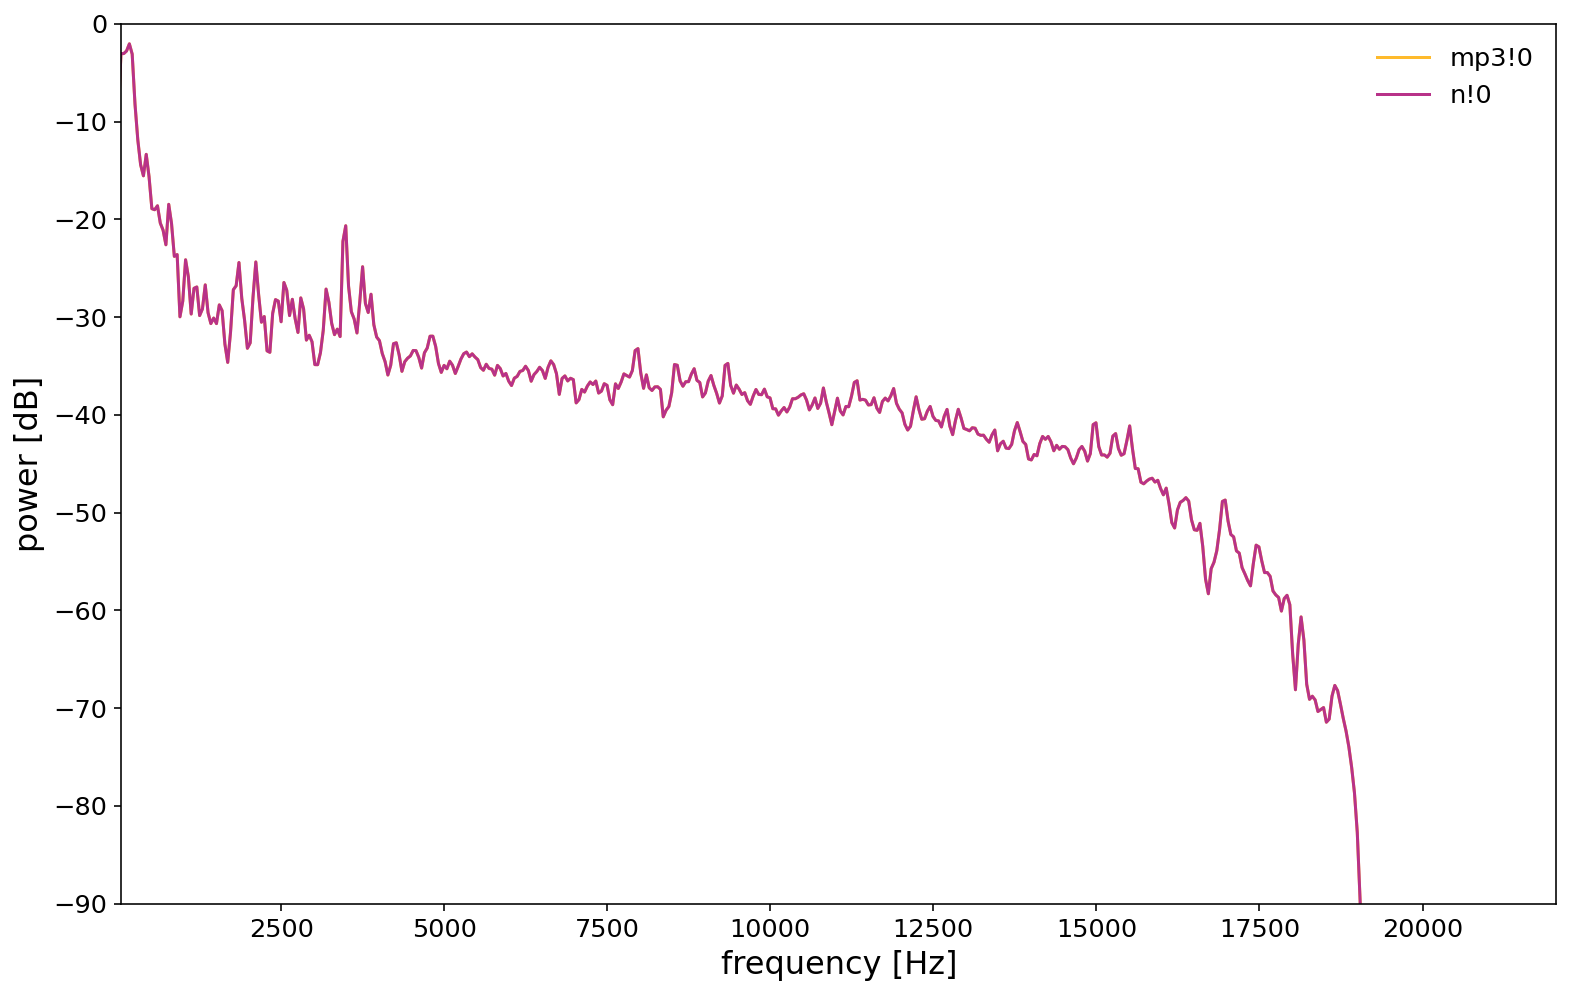

In [7]:
G.plot_periodogram(Edges=edges_concern);

We can observe that the estimated PSD of the input (mp3!0) and output (n!0) stream are exactly the same. This illustrates that `Glift`, i.e. adding same value for each input will not affect the frequency domain. Hence, the processed music will not show a big difference when comparing with the original one in practice.

In [8]:
G.n.I[0].play_data()

mp3!0 : rate= 44.1kHz


In [9]:
G.n.O[0].play_data()

n!0 : rate= 44.1kHz


## Question 2: `Gsample`

In this variation, we need to set the value whose index is not integer multiple of `M` to zero. As required, we set

In [10]:
M = 4

Then we have

mp3 (MP3)         : build       : ../audio/sultans.mp3: 16b, 60s*44.1kHz
Gsample (Graph)   : no errors


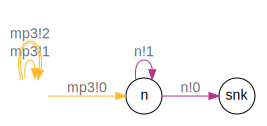

In [11]:
Gsample = Graph(rate=50000) 
G     = Gsample
G.mp3 = MP3(mp3='../audio/sultans.mp3', rate=44100)
G.n   = Node(I=[G.mp3, 1], fo= [lambda x: x[0] if x[1]%M == 0 else 0, lambda x: x[1]+1])
G.n.I[1].init(D=1, x=[0])
G.snk = Node(I=G.n.O[0])
G.build()
G.plot_graph()

In [12]:
G.view(sim=True)

Output()

It is easy to observe that the system keeps every M-th input value (M=4) and set the in-between values to 0. We can also depict the input and output data in one figure to perform a check.

 #cycles real time  cpu time   #events  1(17)*  rate=50.0kHz
     100   2.000ms      0.1s       354  lasso=1(17)*, real time
  126800     2.54s     10.1s    447530  
  261300     5.23s     20.1s    922234  
  300000     6.00s     23.2s   1058882  pause. (46ke/cs)


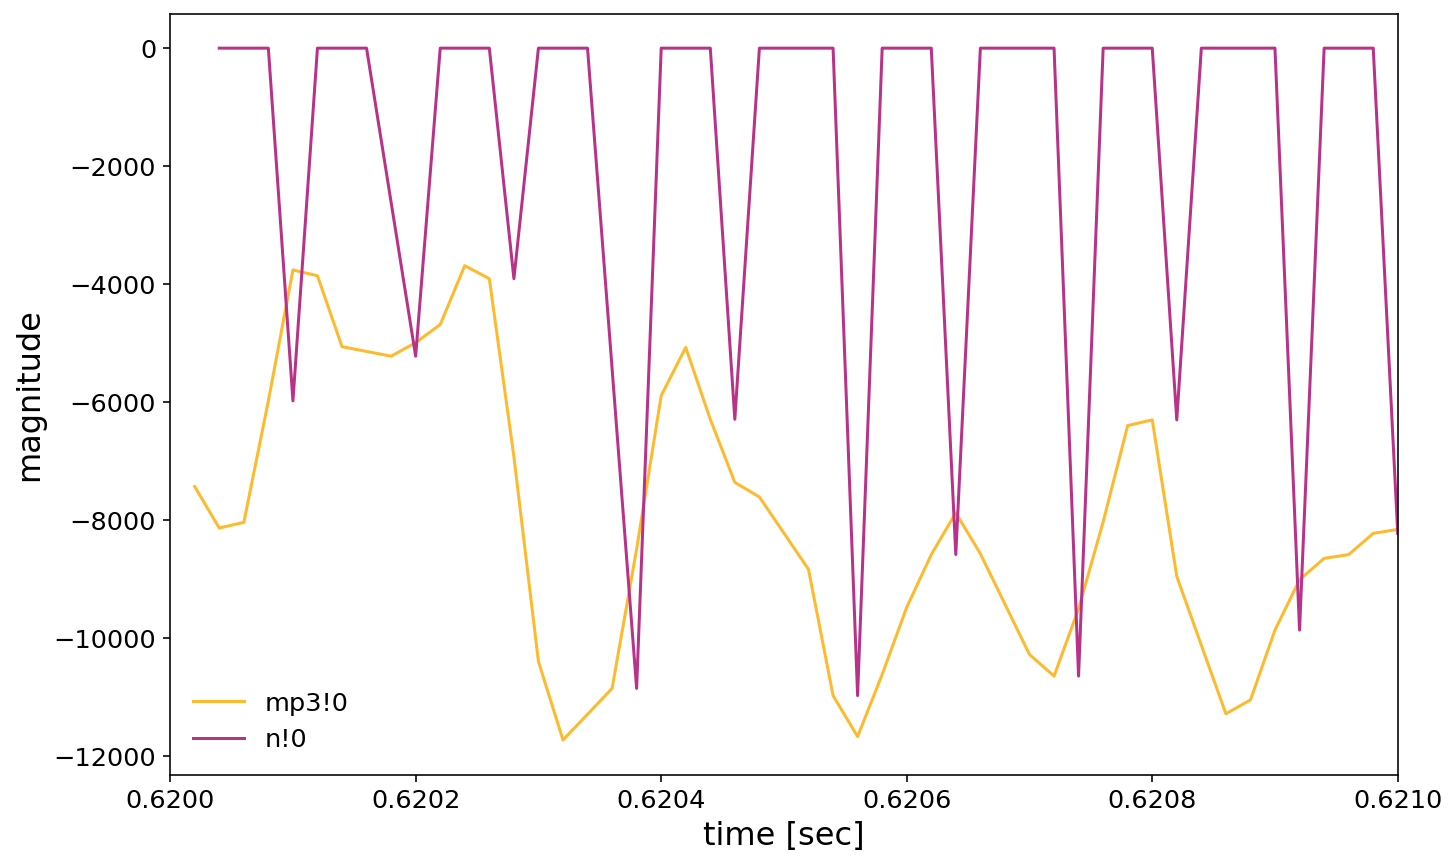

In [13]:
G.sim(T=6)
edges_concern=[G.n.I[0], G.n.O[0]]
G.plot_data(tmin=0.62, tmax=0.621, Edges=edges_concern);

From the previous two checks, we can conclude that the implementation for question `Gsample` is correct. Next, we focus on the general questions for each graph.

### Is the behavior LTI? Why (not)?

No. To clarify this, we assume that this system can be formulated as a piecewise function:

$$
y[t] = 
\begin{cases}
    x[t], & \textit{if $t\ mod(M)\equiv 0$} \\
       0, & \textit{otherwise}
\end{cases}
$$

With the help of the formula above, we can check the linear property.

$$
T(\alpha_1x_1[t] + \alpha_2x_2[t]) = 
\begin{cases}
    \alpha_1x_1[t] + \alpha_2x_2[t] , & \textit{if $\alpha_1x_1[t] + \alpha_2x_2[t]$ exists, and its index is integer multiple of M}\\
    0, & \textit{otherwise}
\end{cases}
$$

$$
\alpha_1y_1[t] + \alpha_2y_2[t] = 
\begin{cases}
    \alpha_1x_1[t] + \alpha_2x_2[t] & \textit{if indices of $x_1[t]$ and $x_2[t]$ are both integer multiple of M}\\
    \alpha_1x_1[t] & \textit{if only index of $x_1[t]$ is integer multiple of M}\\
    \alpha_2x_2[t] & \textit{if only index of $x_2[t]$ is integer multiple of M}\\
    0 & \textit{otherwise}
\end{cases}
$$

So $T(\alpha_1x_1[t] + \alpha_2x_2[t]) = \alpha_1y_1[t] + \alpha_2y_2[t]$ not always holds $\forall \alpha_1, \alpha_2 \in \mathbb C$ and $x_1, x_2 \in \mathbb S$. Hence the behavior of `Gsample` is not LTI.

### What do you note about the `plot_data()`?

The result of `plot_data()` for `Gsample` is shown below.

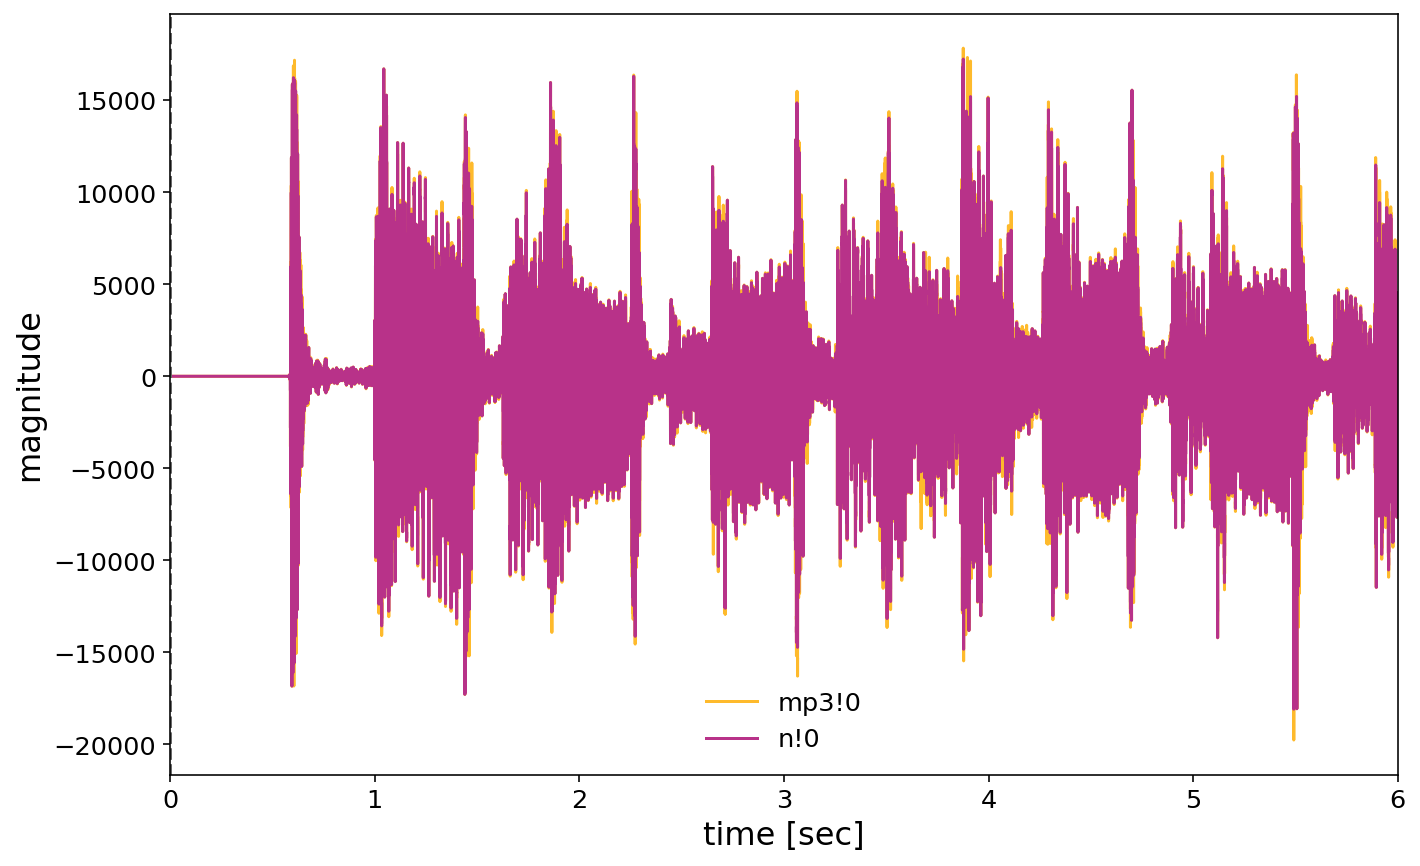

In [14]:
G.plot_data(Edges=edges_concern);

`plot_data()` can provide the time domain infomation of concerned edges. Compared with input stream (mp3!0 in yellow), the output stream (n!0 in purple) basically follows the original shape, but many peaks disappear because they are set to 0, which is equivalent to add high frequency signal to the origin stream. The estimated PSD will clearly show this assumption. 

### What do you note about the `plot_periodogram()`?

The result of `plot_periodogram()` for `Gsample` is shown below.

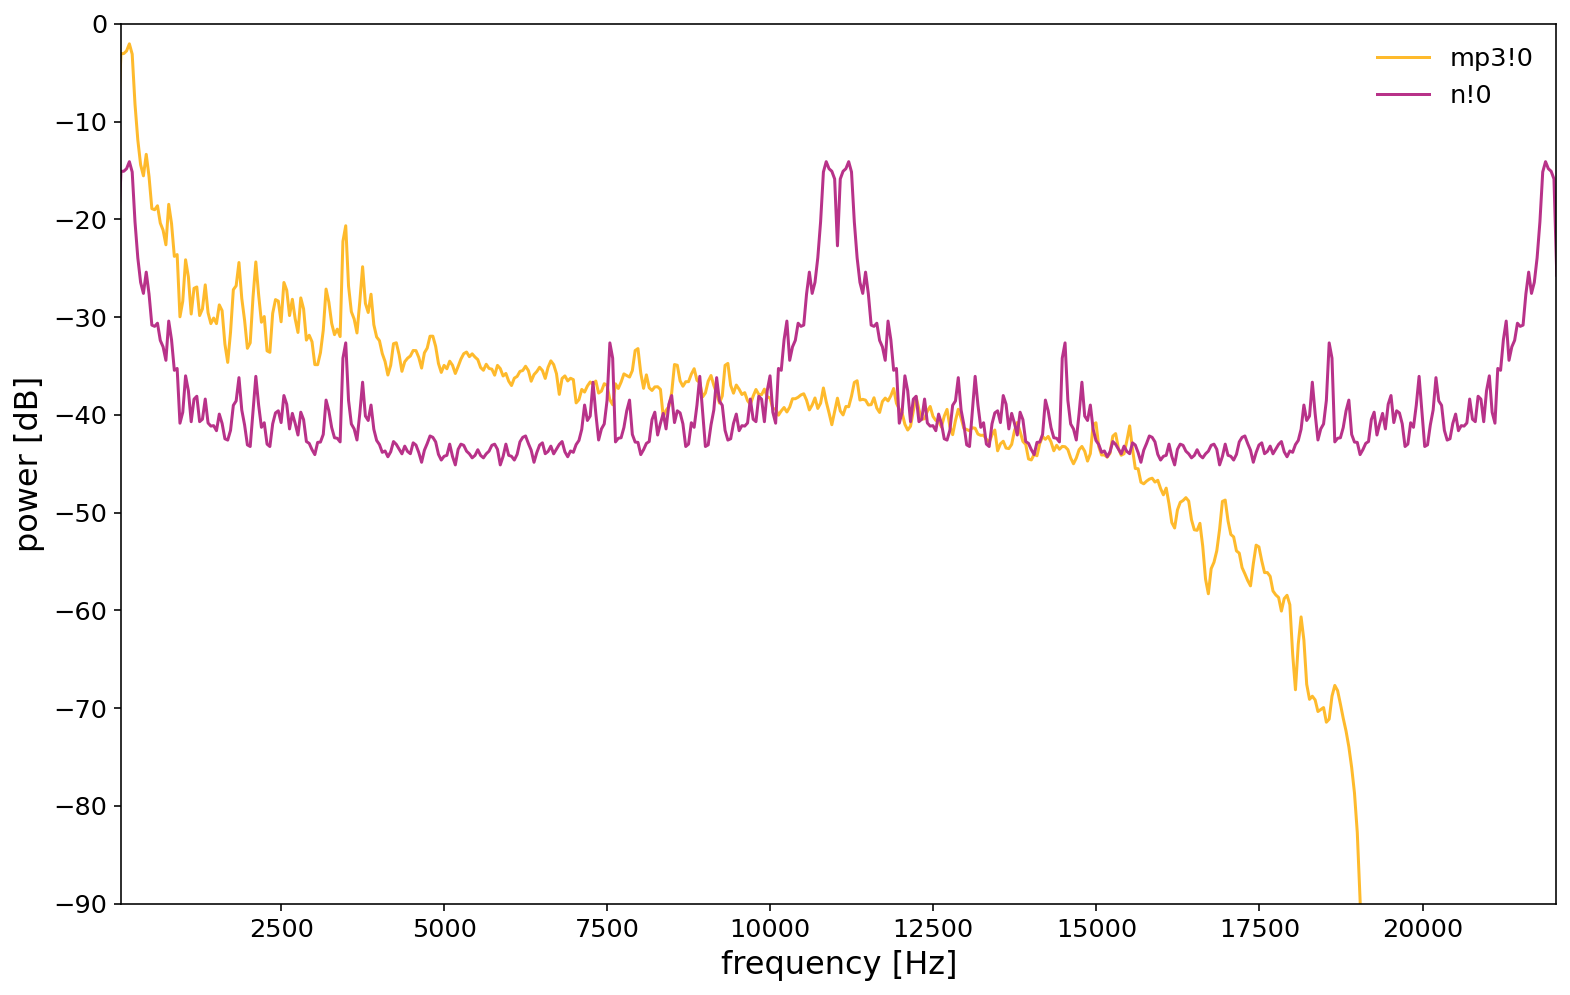

In [15]:
G.plot_periodogram(Edges=edges_concern);

Due to the fact that `M=4` and all in-between values are set to 0, the output stream basically is of $44.1$kHz/$M$= $11025$Hz, so there is an appreciable peak at $11025$Hz. We can also observe that the frequency spectrum is axisymmetric where the axis is $11025$Hz. Each side of this symmetric PSD shape follows the low frequency part of the input stream. The characteristics of high frequency components of input stream are greatly suppressed. In practice, since the power of high frequency part are dramatically rised, the audio file may sound like a lot of noise are added compared with original one, especially for high pitchs, even **distorted**, since the estimated PSD changes significantly.

In [16]:
G.n.O[0].play_data()

n!0 : rate= 44.1kHz


## Question 3: `Ghold`

In this variation, we should keep every M-th input value M times and ignore the in-between input values. Similarly, we set

In [17]:
M=4

Then we have

mp3 (MP3)         : build       : ../audio/sultans.mp3: 16b, 60s*44.1kHz
Ghold (Graph)     : no errors


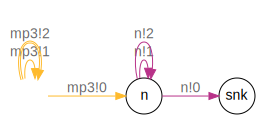

In [18]:
Ghold = Graph(rate=50000) 
G     = Ghold
G.mp3 = MP3(mp3='../audio/sultans.mp3', rate=44100)
G.n   = Node(I=[G.mp3, 1, 2], fo= [
    lambda x: x[0] if x[1]%M == 0 else x[2], 
    lambda x: x[1]+1, 
    lambda x: x[0] if x[1]%M == 0 else x[2]]
)
G.n.I[1].init(D=1, x=[0])
G.n.I[2].init(D=1, x=[0])
G.snk = Node(I=G.n.O[0])
G.build()
G.plot_graph()

We can run a simulation to have a check.

In [19]:
G.view(sim=True)

Output()

It is easy to observe that the system repeats every `M`-th input value (M=4) `M` times and ignore the in-between values. We can also depict the input and output data in one figure to perform a check.

 #cycles real time  cpu time   #events  1(17)*  rate=50.0kHz
     100   2.000ms      0.1s       442  lasso=1(17)*, real time
  120000     2.40s     10.1s    529412  
  240200     4.80s     20.1s   1059707  
  300000     6.00s     25.0s   1323602  pause. (53ke/cs)


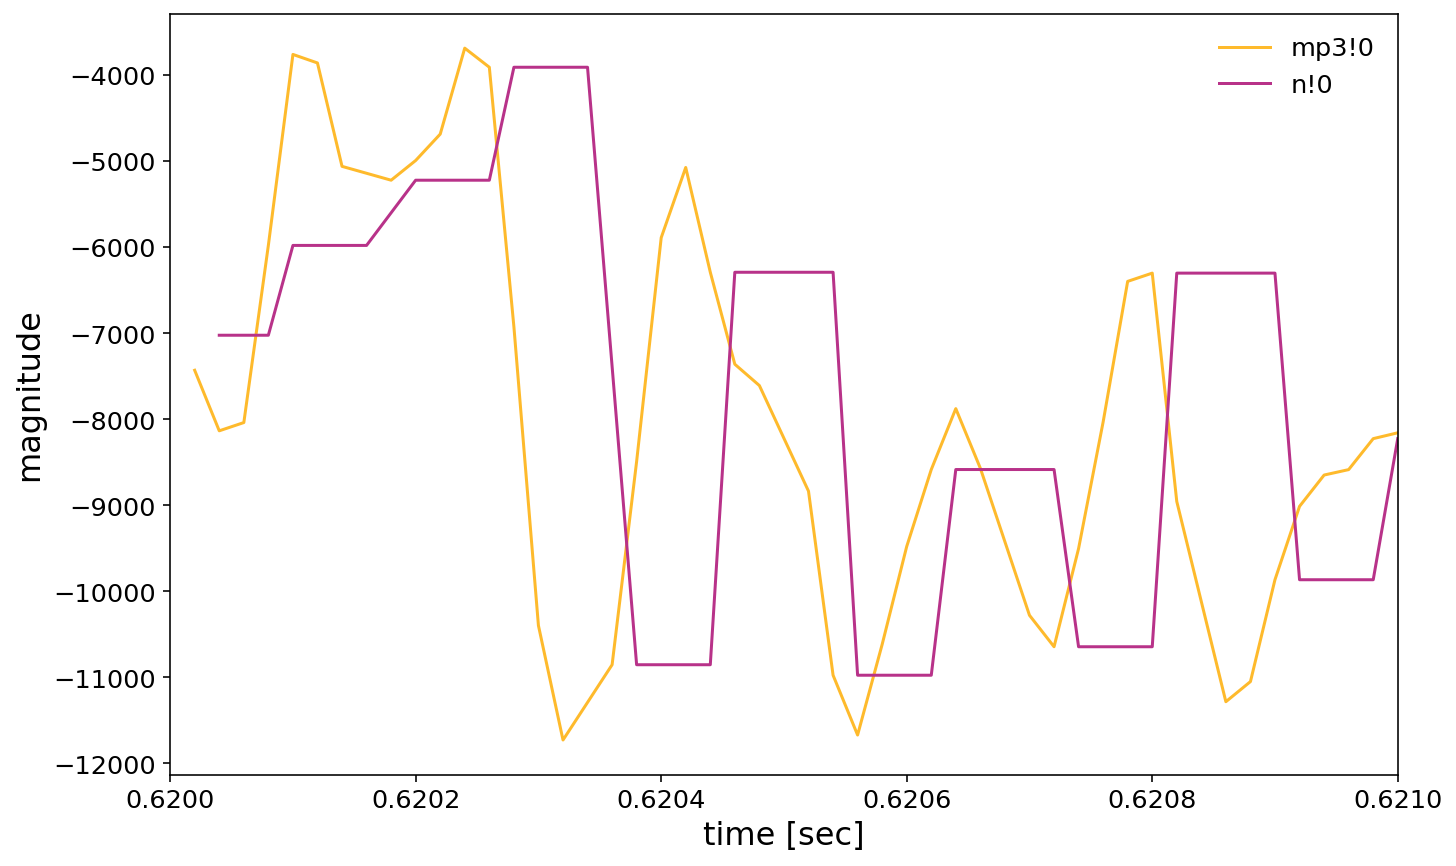

In [20]:
G.sim(T=6)
edges_concern=[G.n.I[0], G.n.O[0]]
G.plot_data(tmin=0.62, tmax=0.621, Edges=edges_concern);

From the previous two checks, we can conclude that the implementation for question `Ghold` is correct. Next, we focus on the general questions for each graph.

### Is the behavior LTI? Why (not)?

No. Similarly, we first formulate `Ghold` as follows:

$$
T(x[t]) = y[t] = x[t - (t\ mod(M))]
$$

With the help of the formula above, we can check the linear property.

$$
T(\alpha_1x_1[t] + \alpha_2x_2[t]) = x[t' - (t'\ mod(M))]
$$

where $t'$ is the index of $\alpha_1x_1[t] + \alpha_2x_2[t]$ (if exists). And

$$
\alpha_1y_1[t] + \alpha_2y_2[t] = \alpha_1x_1[t - (t\ mod(M))] + \alpha_2x_2[t - (t\ mod(M))]
$$

So obviously $T(\alpha_1x_1[t] + \alpha_2x_2[t]) = \alpha_1y_1[t] + \alpha_2y_2[t]$ does not always hold. Thus the behavior of `Ghold` is not linear, i.e. not LTI.

### What do you note about the `plot_data()`?

The result of `plot_data()` for `Ghold` is shown below.

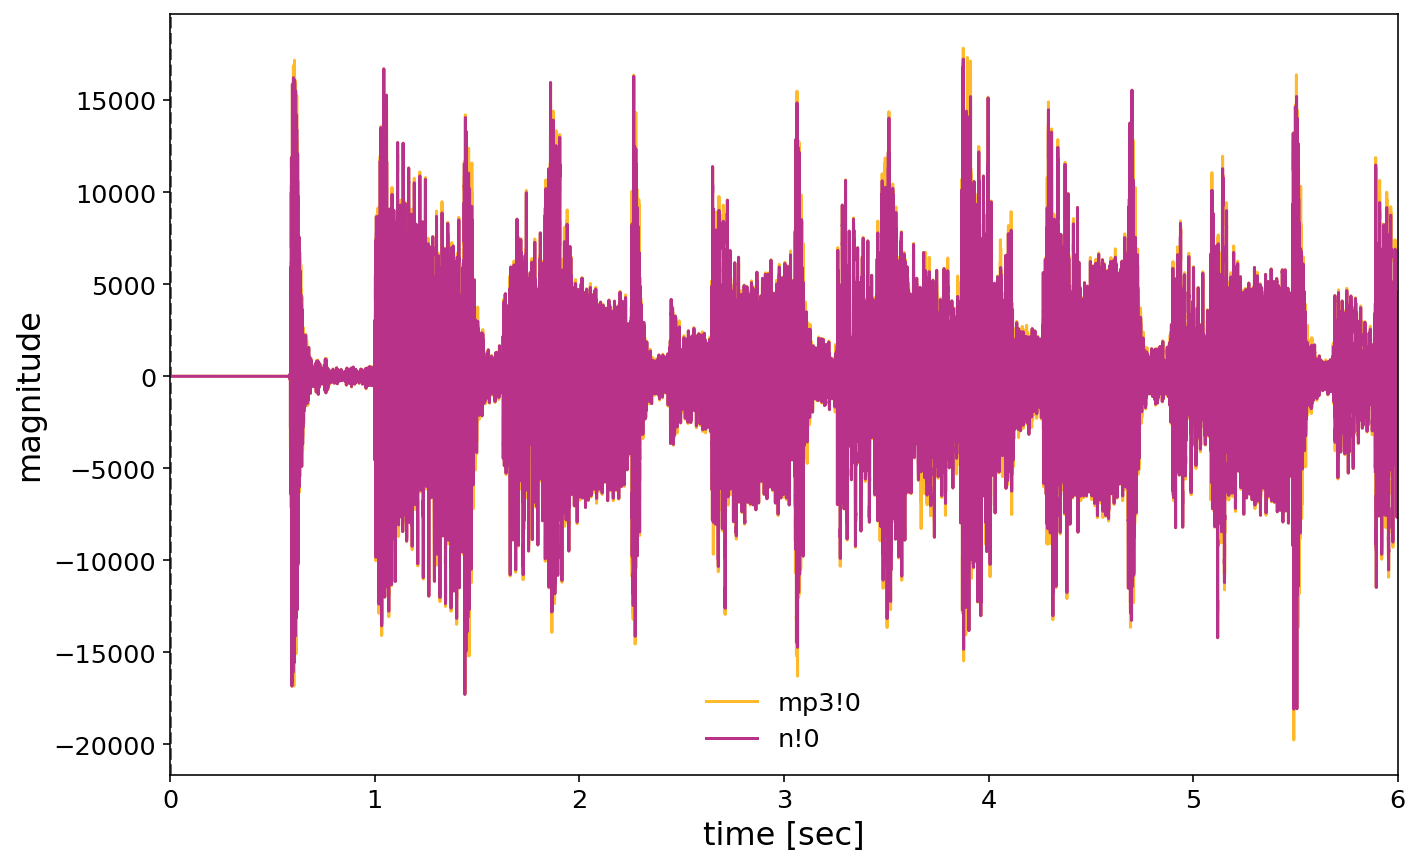

In [21]:
G.plot_data(Edges=edges_concern);

Similarly, compared with input stream (mp3!0 in yellow), the output stream (n!0 in purple) basically follows the original shape, but many peaks disappear because they are substituded by previous samples, which is equivalent to add high frequency signal to the origin stream. The estimated PSD will clearly show this assumption. 

### What do you note about the `plot_periodogram()`?

The result of `plot_periodogram()` for `Ghold` is shown below.

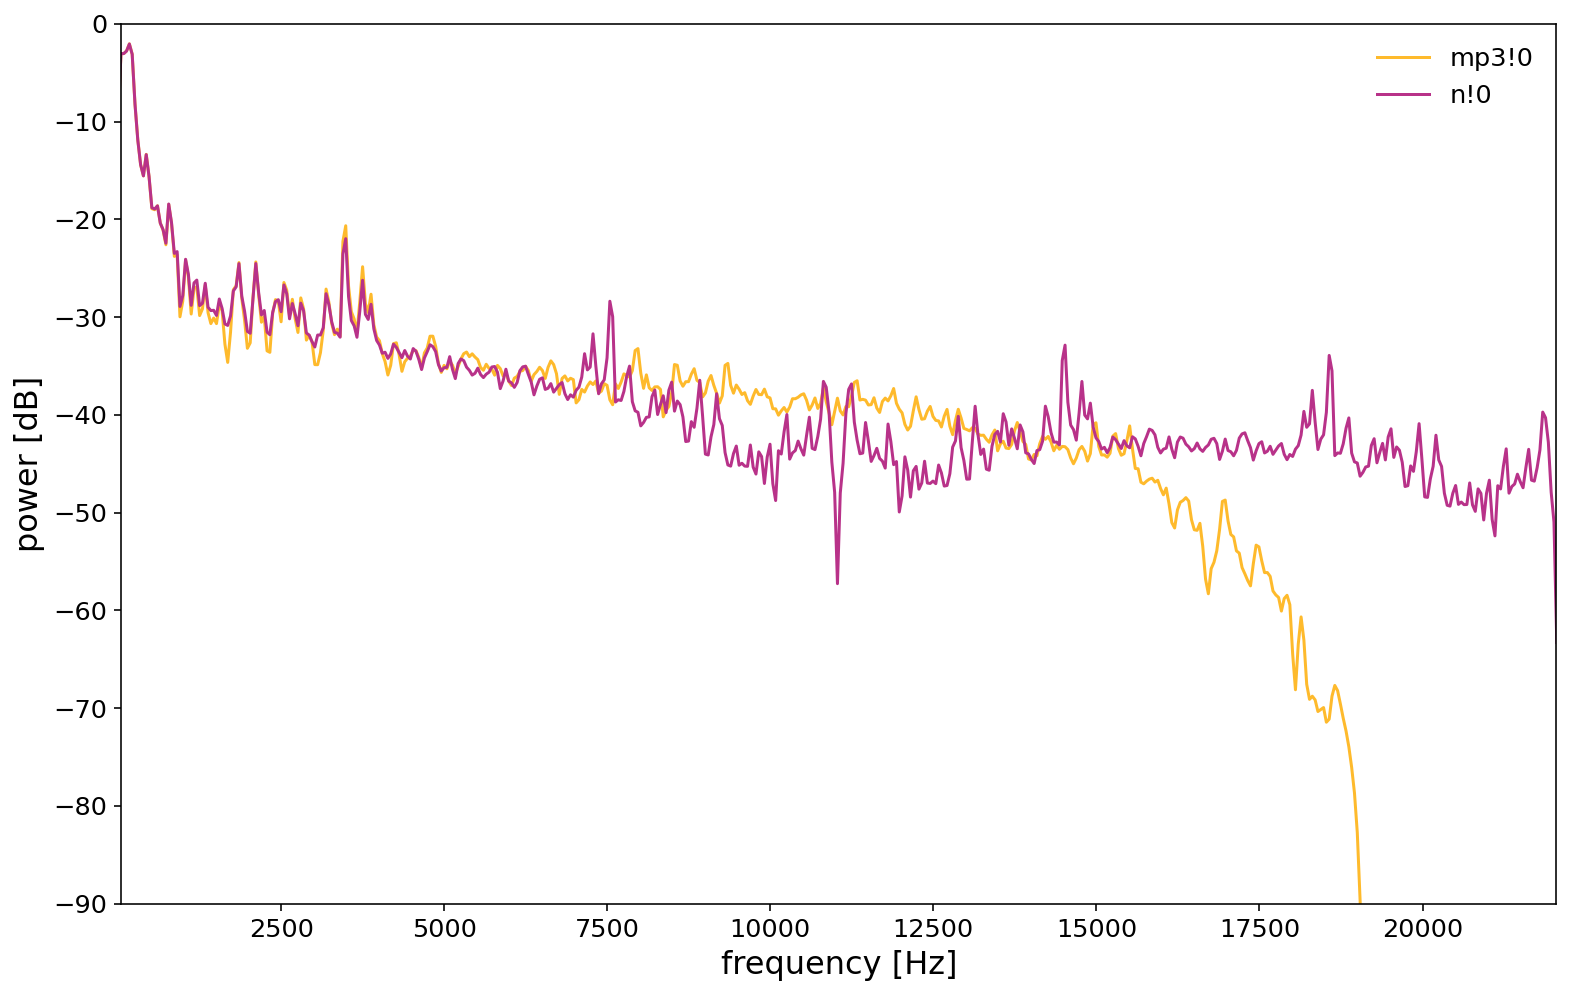

In [22]:
G.plot_periodogram(Edges=edges_concern);

Due to the fact that `M=4` and all in-between values are substituded by the previous closest `M`-th value, the output stream will show an axisymmetric shape where the axis is $44.1$kHz/$M$= $11025$Hz. But different from `Gsample`, the overall PSD shape of output follows the input stream at the low frequency part. Whereas the power of high frequency part rises a lot. Therefore, the output audio will **not** suffer distortion since low frequency parts are kept, but sound like noise are added because of the increase of high frequency energy, especially for high pitchs.

In [23]:
G.n.O[0].play_data()

n!0 : rate= 44.1kHz
